In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import copy
datafile = "../caracteristicas.csv"
data = pd.read_csv(datafile)

# Variables cualitativas

minimum_nights_x -0.0041963299906949015 -0.015575215942989667


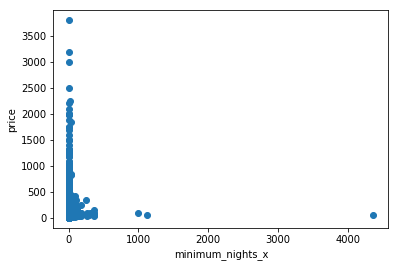

number_of_reviews -0.03958088646687089 -0.09549948154504628


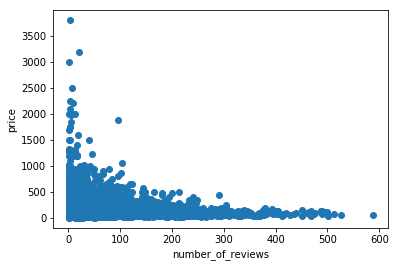

reviews_per_month -0.07438315603477284 -5.787674333606661


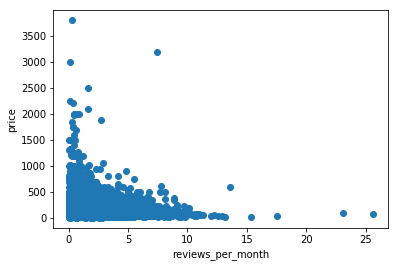

calculated_host_listings_count 0.16529037968558608 0.7061996256482086


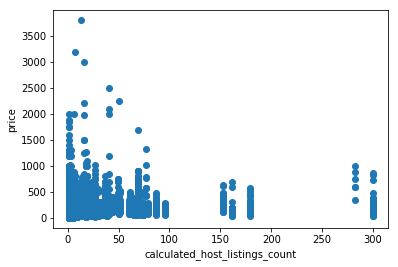

accommodates 0.5610913476942396 38.779478274273835


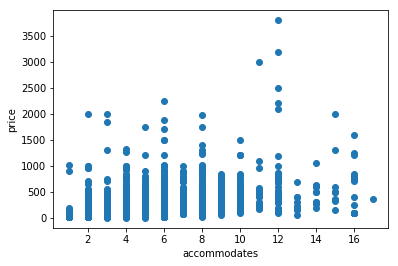

bathrooms 0.24118302744026968 30.6497724019136


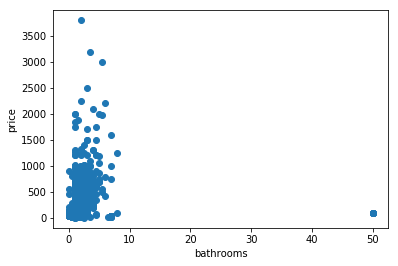

bedrooms 0.38334070231209755 37.87416863808638


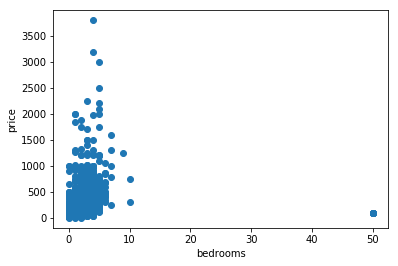

beds 0.42199210036175694 36.969100887851724


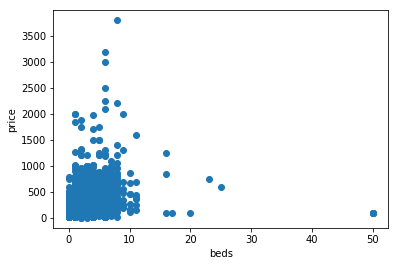

cleaning_fee 0.5314757441752354 1.8160767318971751


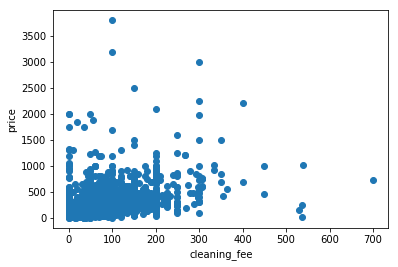

minimum_nights_y -0.0041963299906949015 -0.015575215942989667


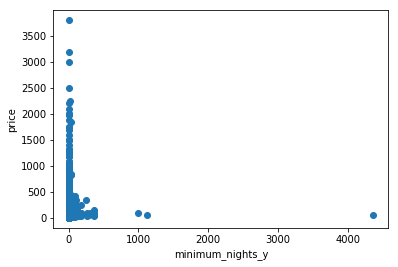

maximum_nights 0.006086138778297899 0.00015373293531637796


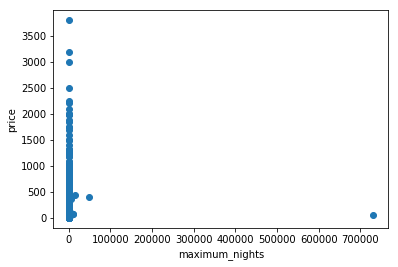

minimum_minimum_nights -0.004047262256887694 -0.015069333218244729


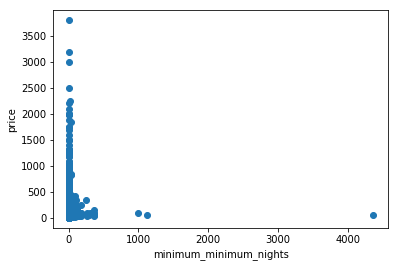

maximum_minimum_nights -0.0011923719050358664 -0.004286292208941844


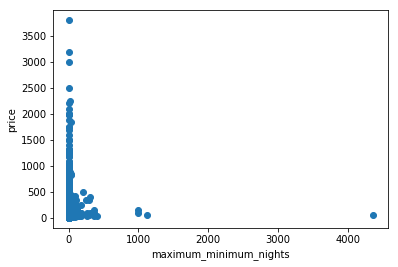

minimum_maximum_nights 0.004543529949037631 0.00011475608447441069


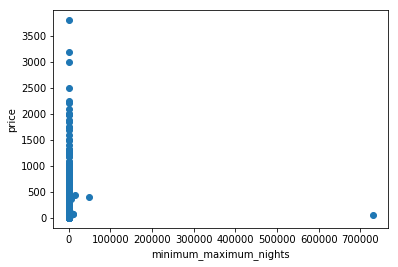

maximum_maximum_nights 0.006028728621735564 0.00015227682923574102


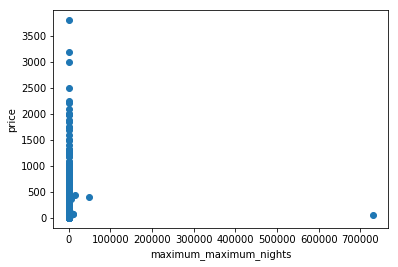

review_scores_rating 0.01857142324852408 0.283140093656569


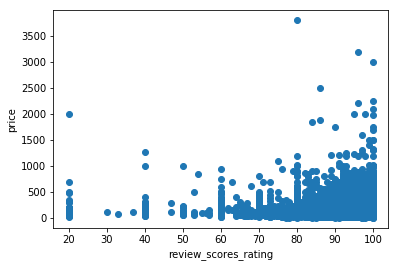

review_scores_accuracy -0.028833402477287162 -4.485018705434289


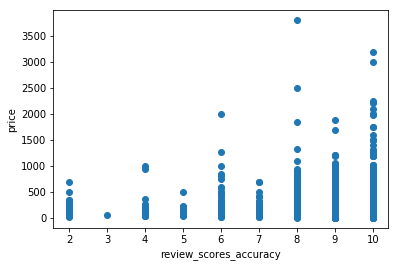

review_scores_cleanliness 0.04868882313270077 6.092101987272938


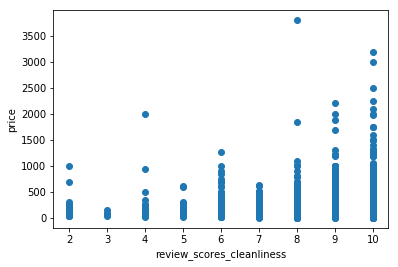

review_scores_checkin -0.02294750942886754 -3.826348953714334


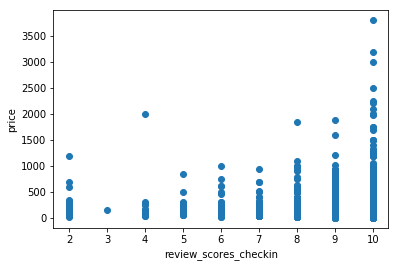

review_scores_communication -0.05987000685870177 -10.2128174169987


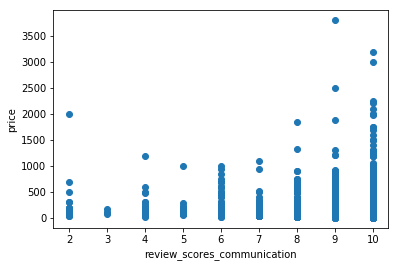

review_scores_location 0.06787404751093713 13.191197975498815


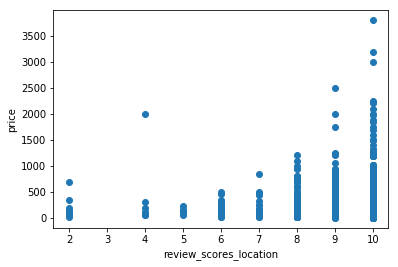

review_scores_value -0.0375739518271846 -5.145435184026198


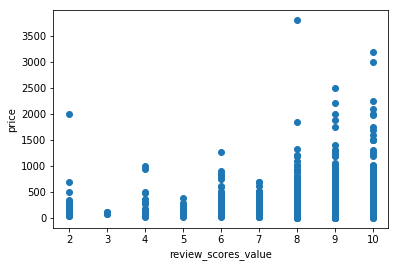

In [12]:
cont_variable = data.drop(['id','Unnamed: 0','host_response_time','host_response_rate','room_type','bed_type','property_type','cancellation_policy'],axis=1)
#print(cont_variable.head(3))
#covarianza = cont_variable.['price']['minimum_nights_x']
#print(covarianza)
#print(cont_variable.dtypes)
col1 = cont_variable.columns
r=[]
p=[]
i = 0
for c in range(1,len(col1)):
    #print(col[c])
    r.append(cont_variable.corr(method="pearson")["price"][col1[c]])
    p.append(cont_variable.cov()[col1[c]]["price"]/cont_variable[col1[c]].var())
    print(col1[c],r[i],p[i])
    i += 1
    plt.scatter(cont_variable[col1[c]],cont_variable["price"])
    plt.xlabel(col1[c])
    plt.ylabel("price")
    plt.show()




# Variables cualitativas

In [13]:
#categorical_variables= pd.DataFrame(data[['price','host_response_time','room_type','bed_type','property_type','cancellation_policy']]).copy()
categorical_variables= pd.DataFrame(data[['price','room_type','bed_type','property_type','host_response_time','host_response_rate','cancellation_policy']]).copy()
#print(categorical_variables)
categorical_variables = categorical_variables.astype(str)
categorical_variables.price = categorical_variables.price.astype(int)
print(categorical_variables.dtypes)

price                   int64
room_type              object
bed_type               object
property_type          object
host_response_time     object
host_response_rate     object
cancellation_policy    object
dtype: object


In [27]:
col2 = categorical_variables.columns
#print(col2)
#title = 'price ~ '+str(col2[1])
#print(title)
for c in range(1,len(col2)):
    title = 'price ~ '+ col2[c]
    #print(title)
    mod = ols(title,data=categorical_variables).fit()
    aov_table = sm.stats.anova_lm(mod, type=2)
    print (aov_table)
    #print(mod.summary())
    #df = categorical_variables
    #print(df)
    #print("------------------------------------------------------")
    mc = MultiComparison(categorical_variables['price'], categorical_variables[col2[c]])
    tukey_result = mc.tukeyhsd(alpha=0.05)
    print(tukey_result)
    print('Grupos manejados: {}'.format(mc.groupsunique))
    title =''

                df        sum_sq       mean_sq           F         PR(>F)
room_type      2.0  8.775835e+06  4.387918e+06  326.602852  9.340532e-141
Residual   25129.0  3.376088e+08  1.343503e+04         NaN            NaN
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper   reject
------------------------------------------------
  0      1    -59.2364  -65.1046 -53.3682  True 
  0      2    -90.3638 -110.9216 -69.806   True 
  1      2    -31.1274  -52.353  -9.9018   True 
------------------------------------------------
Grupos manejados: ['0' '1' '2']
               df        sum_sq        mean_sq          F        PR(>F)
bed_type      4.0  2.698016e+06  674504.076919  49.313139  2.135073e-41
Residual  25127.0  3.436866e+08   13677.978952        NaN           NaN
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper   reject
------------------------------------------------
  0      1    -14.1667 -147.0464 118

                         df        sum_sq        mean_sq          F  \
host_response_rate     78.0  1.084817e+07  139079.050862  10.384409   
Residual            25053.0  3.355364e+08   13393.063803        NaN   

                           PR(>F)  
host_response_rate  6.387270e-120  
Residual                      NaN  
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
  0      10    -12.0693 -155.4968  131.3583 False 
  0     100    15.3925   -14.5734  45.3583  False 
  0      13    -33.5693 -315.7597  248.6212 False 
  0      14     -5.236  -224.6278  214.1559 False 
  0      15    -30.236  -517.1906  456.7186 False 
  0      17     1.964   -217.4278  221.3559 False 
  0      19    -15.236  -502.1906  471.7186 False 
  0      20    -3.5908   -95.8157  88.6341  False 
  0      22    -21.236  -303.4264  260.9545 False 
  0      23    -40.236  -527.1906  446.7186 False 
  0      25    